In [27]:
import pandas as pd
import nltk

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /afs/inf.ed.ac.uk/user/s17/s1735229/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
stop_words = stopwords.words('english')

In [7]:
!pwd

/afs/inf.ed.ac.uk/user/s17/s1735229/Desktop/SDP-Project


In [14]:
clips = pd.read_csv("../clips/new_data2.csv", names=["Description", "clips"])

In [21]:
clips["Description"].iloc[-2]

'Dropping a plastic traffic cone onto wood'

In [18]:
### glass, plastic, paper, metal, trash, cardboard

In [22]:
"plastic" in clips["Description"].iloc[-2]

True

In [25]:
clips["Description"].iloc[-2].lower()

'dropping a plastic traffic cone onto wood'

In [62]:
array = []

In [63]:
for y in range(len(clips)):
    x = clips["Description"].iloc[y]
    
    if ("plastic" in x.lower() or "bottle" in x.lower() or "cd case" in x.lower()):
        array.append("plastic")
    elif ("cardboard" in x.lower()or "storage" in x.lower() or "box" in x.lower()):
        array.append("cardboard")
    elif ("glass" in x.lower()):
        array.append("glass")
    elif ("metal" in x.lower() or "aluminum" in x.lower() or "keys" in x.lower() or "pan" in x.lower()
         
         or "chains" in x.lower() or "coins" in x.lower() or "phone" in x.lower() or "dumbbell" in x.lower() 
          
          or "coin" in x.lower() or "knife" in x.lower() or "key" in x.lower() or "cd" in x.lower()
         ):
        
        array.append("metal")
    elif ("paper" in x.lower() or "paper" in x.lower()):
        array.append("paper")
        
    elif ("wood" in x.lower()):
        array.append("wood")
    else:
        print(x)
        array.append("trash")

desc,path
Backpack - large - hitting and thudding 2."
Backpack - large - hitting and thudding 1.
Backpack - large - hitting 2.
Backpack - large - hitting 1.
Backpack - falling softly 2.
Backpack - falling softly 1.
Backpack - falling hard 4.
Backpack - falling hard 3.
Backpack - falling hard 2.
Backpack - falling hard 1.
Bullet shells - falling and clanking on other shells 4.
Bullet shells - falling and clanking on other shells 3.
Bullet shells - falling and clanking on other shells 2.
Bullet shells - falling and clanking on other shells 1.
Object dropping into water 4.
Object dropping into water 3.
Object dropping into water 2.
Object dropping into water 1.
Backpack - large - hitting and thudding 2.
Backpack - large - hitting and thudding 1.
Backpack - large - hitting 2.
Backpack - large - hitting 1.
Backpack - falling softly 2.
Backpack - falling softly 1.
Backpack - falling hard 4.
Backpack - falling hard 3.
Backpack - falling hard 2.
Backpack - falling hard 1.
Bullet shells - falli

In [64]:
len(array)

2562

In [65]:
len(clips)

2562

In [66]:
clips["category"] = array

In [70]:
##preprocessing take the loudest part of the data and use that only

In [78]:
import librosa as lib
import matplotlib.pyplot as plt

In [112]:
a,y= lib.load("../clips/new_clips2/100.mp3")

/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


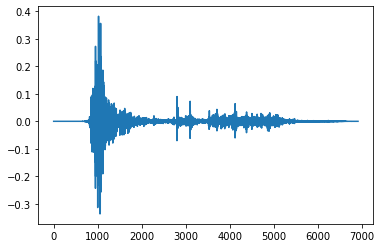

In [113]:
plt.plot(a)

In [80]:
import numpy as np

In [81]:
np.max(x)

0.50842726

In [82]:
np.min(x)

-0.4043815

In [90]:
x[0] == x[1]

False

In [ ]:
areaofsilence = []
previous = 0
for y in range(len(x))

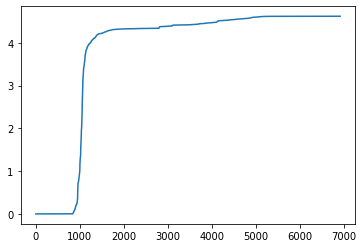

In [114]:
plt.plot(np.cumsum(a**2))

In [115]:
variance = []
ranges = []
for x in range(len(a)-2001):
    variance.append(np.var(a[x:x+2000]))
    ranges.append((x,x+2000))

In [116]:
np.argmax(variance)

823

In [103]:
ranges[1615]

(1615, 3615)

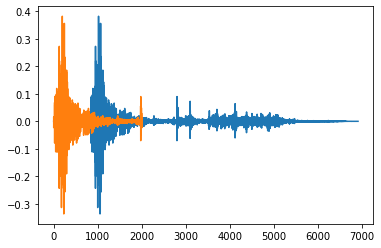

In [117]:
plt.plot(a)
plt.plot(a[823:2823])

In [118]:
soundclips = np.array()

TypeError: array() missing required argument 'object' (pos 1)

In [122]:
import os

In [140]:
def get_window(filename, sr=22050, wnd_size=2000):
    x, _ = librosa.load(filename, sr=22050)
    y = np.cumsum(x**2)
    y /= y[-1]
    z = y[wnd_size:] - y[:-wnd_size]
    s = z.argmax()
    e = s + wnd_size
    return x[s:e]

In [143]:
clips_arrays = []
tags = []
for x in clips["clips"]:
    print(x)
    try:
        clips_arrays.append(get_window("../clips/"+x))
        tags.append(x)
    except:
        continue

new_clips2/0.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/3.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/4.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/5.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/6.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/7.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/8.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/9.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/10.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/11.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/12.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/13.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/14.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/15.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/16.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/17.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/18.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/19.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/20.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/21.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/22.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/23.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/24.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/25.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/26.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/27.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/28.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/29.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/30.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/31.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/32.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/33.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/34.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/35.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/36.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/37.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/38.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/39.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/40.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/41.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/42.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/43.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/44.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/45.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/46.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/47.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/48.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/49.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/50.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/51.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/52.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/53.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/54.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/55.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/56.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/57.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/58.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/59.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/60.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/61.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/62.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/63.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/64.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/65.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/66.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/67.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/68.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/69.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/70.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/71.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/72.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/73.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/74.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/75.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/76.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/77.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/78.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/79.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/80.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/81.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/82.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/83.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/84.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/85.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/86.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/87.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/88.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/89.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/90.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/91.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/92.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/93.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/94.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/95.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/96.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/97.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/98.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/99.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/100.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/101.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/102.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/103.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/104.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/105.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/106.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/107.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/108.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/109.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/110.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/111.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/112.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/113.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/114.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/115.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/116.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/117.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/118.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/119.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/120.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/121.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/122.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/123.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/124.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/125.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/126.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/127.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/128.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/129.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/130.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/131.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/132.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/133.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/134.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/135.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/136.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/137.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/138.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/139.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/140.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/141.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/142.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/143.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/144.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/145.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/146.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/147.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/148.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/149.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/150.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/151.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/152.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/153.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/154.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/155.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/156.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/157.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/158.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/159.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/160.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/161.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/162.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/163.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/164.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/165.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/166.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/167.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/168.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/169.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/170.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/171.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/172.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/173.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/174.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/175.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/176.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/177.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/178.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/179.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/180.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/181.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/182.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/183.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/184.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/185.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/186.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/187.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/188.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/189.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/190.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/191.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/192.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/193.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/194.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/195.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/196.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/197.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/198.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/199.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/200.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/201.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/202.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/203.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/204.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/205.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/206.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/207.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/208.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/209.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/210.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/211.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/212.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/213.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/214.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/215.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/216.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/217.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/218.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/219.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/220.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/221.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/222.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/223.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/224.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/225.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/226.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/227.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/228.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/229.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/230.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/231.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/232.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/233.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/234.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/235.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/236.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/237.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/238.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/239.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/240.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/241.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/242.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/243.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/244.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/245.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/246.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/247.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/248.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/249.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/250.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/251.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/252.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/253.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/254.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/255.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/256.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/257.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/258.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/259.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/260.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/261.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/262.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/263.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/264.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/265.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/266.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/267.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/268.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/269.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/270.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/271.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/272.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/273.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/274.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/275.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/276.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/277.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/278.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/279.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/280.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/281.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/282.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/283.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/284.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/285.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/286.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/287.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/288.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/289.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/290.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/291.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/292.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/293.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/294.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/295.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/296.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/297.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/298.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/299.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/300.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/301.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/302.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/303.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/304.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/305.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/306.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/307.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/308.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/309.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/310.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/311.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/312.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/313.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/314.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/315.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/316.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/317.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/318.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/319.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/320.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/321.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/322.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/323.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/324.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/325.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/326.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/327.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/328.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/329.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/330.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/331.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/332.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/333.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/334.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/335.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/336.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/337.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/338.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/339.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/340.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/341.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/342.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/343.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/344.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/345.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/346.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/347.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/348.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/349.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/350.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/351.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/352.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/353.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/354.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/355.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/356.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/357.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/358.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/359.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/360.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/361.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/362.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/363.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/364.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/365.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/366.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/367.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/368.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/369.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/370.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/371.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/372.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/373.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/374.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/375.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/376.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/377.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/378.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/379.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/380.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/381.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/382.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/383.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/384.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/385.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/386.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/387.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/388.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/389.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/390.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/391.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/392.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/393.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/394.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/395.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/396.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/397.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/398.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/399.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/400.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/401.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/402.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/403.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/404.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/405.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/406.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/407.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/408.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/409.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/410.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/411.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/412.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/413.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/414.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/415.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/416.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/417.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/418.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/419.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/420.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/421.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/422.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/423.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/424.mp3
new_clips2/425.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/426.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/427.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/428.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/429.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/430.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/431.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/432.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/433.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/434.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/435.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/436.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/437.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/438.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/439.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/440.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/441.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/442.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/443.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/444.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/445.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/446.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/447.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/448.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/449.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/450.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/451.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/452.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/453.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/454.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/455.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/456.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/457.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/458.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/459.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/460.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/461.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/462.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/463.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/464.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/465.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/466.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/467.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/468.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/469.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/470.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/471.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/472.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/473.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/474.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/475.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/476.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/477.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/478.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/479.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/480.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/481.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/482.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/483.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/484.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/485.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/486.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/487.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/488.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/489.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/490.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/491.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/492.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/493.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/494.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/495.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/496.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/497.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/498.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/499.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/500.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/501.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/502.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/503.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/504.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/505.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/506.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/507.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/508.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/509.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/510.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/511.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/512.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/513.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/514.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/515.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/516.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/517.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/518.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/519.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/520.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/521.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/522.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/523.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/524.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/525.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/526.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/527.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/528.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/529.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/530.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/531.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/532.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/533.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/534.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/535.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/536.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/537.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/538.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/539.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/540.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/541.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/542.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/543.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/544.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/545.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/546.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/547.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/548.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/549.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/550.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/551.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/552.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/553.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/554.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/555.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/556.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/557.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/558.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/559.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/560.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/561.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/562.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/563.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/564.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/565.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/566.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/567.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/568.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/569.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/570.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/571.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/572.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/573.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/574.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/575.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/576.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/577.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/578.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/579.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/580.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/581.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/582.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/583.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/584.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/585.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/586.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/587.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/588.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/589.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/590.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/591.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/592.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/593.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/594.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/595.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/596.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/597.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/598.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/599.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/600.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/601.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/602.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/603.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/604.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/605.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/606.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/607.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/608.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/609.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/610.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/611.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/612.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/613.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/614.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/615.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/616.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/617.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/618.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/619.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/620.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/621.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/622.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/623.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/624.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/625.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/626.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/627.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/628.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/629.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/630.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/631.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/632.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/633.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/634.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/635.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/636.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/637.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/638.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/639.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/640.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/641.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/642.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/643.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/644.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/645.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/646.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/647.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/648.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/649.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/650.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/651.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/652.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/653.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/654.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/655.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/656.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/657.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/658.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/659.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/660.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/661.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/662.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/663.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/664.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/665.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/666.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/667.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/668.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/669.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/670.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/671.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/672.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/673.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/674.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/675.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/676.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/677.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/678.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/679.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/680.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/681.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/682.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/683.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/684.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/685.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/686.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/687.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/688.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/689.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/690.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/691.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/692.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/693.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/694.mp3
new_clips2/695.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/696.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/697.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/698.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/699.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/700.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/701.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/702.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/703.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/704.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/705.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/706.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/707.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/708.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/709.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/710.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/711.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/712.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/713.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/714.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/715.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/716.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/717.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/718.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/719.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/720.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/721.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/722.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/723.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/724.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/725.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/726.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/727.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/728.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/729.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/730.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/731.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/732.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/733.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/734.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/735.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/736.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/737.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/738.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/739.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/740.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/741.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/742.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/743.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/744.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/745.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/746.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/747.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/748.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/749.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/750.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/751.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/752.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/753.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/754.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/755.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/756.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/757.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/758.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/759.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/760.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/761.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/762.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/763.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/764.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/765.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/766.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/767.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/768.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/769.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/770.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/771.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/772.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/773.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/774.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/775.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/776.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/777.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/778.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/779.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/780.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/781.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/782.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/783.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/784.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/785.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/786.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/787.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/788.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/789.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/790.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/791.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/792.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/793.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/794.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/795.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/796.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/797.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/798.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/799.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/800.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/801.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/802.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/803.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/804.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/805.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/806.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/807.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/808.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/809.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/810.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/811.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/812.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/813.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/814.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/815.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/816.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/817.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/818.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/819.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/820.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/821.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/822.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/823.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/824.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/825.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/826.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/827.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/828.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/829.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/830.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/831.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/832.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/833.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/834.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/835.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/836.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/837.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/838.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/839.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/840.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/841.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/842.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/843.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/844.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/845.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/846.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/847.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/848.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/849.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/850.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/851.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/852.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/853.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/854.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/855.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/856.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/857.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/858.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/859.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/860.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/861.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/862.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/863.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/864.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/865.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/866.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/867.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/868.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/869.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/870.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/871.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/872.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/873.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/874.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/875.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/876.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/877.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/878.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/879.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/880.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/881.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/882.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/883.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/884.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/885.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/886.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/887.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/888.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/889.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/890.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/891.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/892.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/893.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/894.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/895.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/896.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/897.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/898.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/899.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/900.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/901.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/902.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/903.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/904.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/905.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/906.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/907.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/908.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/909.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/910.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/911.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/912.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/913.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/914.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/915.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/916.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/917.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/918.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/919.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/920.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/921.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/922.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/923.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/924.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/925.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/926.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/927.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/928.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/929.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/930.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/931.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/932.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/933.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/934.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/935.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/936.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/937.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/938.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/939.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/940.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/941.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/942.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/943.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/944.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/945.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/946.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/947.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/948.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/949.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/950.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/951.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/952.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/953.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/954.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/955.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/956.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/957.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/958.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/959.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/960.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/961.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/962.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/963.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/964.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/965.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/966.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/967.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/968.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/969.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/970.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/971.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/972.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/973.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/974.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/975.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/976.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/977.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/978.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/979.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/980.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/981.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/982.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/983.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/984.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/985.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/986.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/987.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/988.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/989.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/990.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/991.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/992.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/993.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/994.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/995.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/996.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/997.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/998.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/999.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1000.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1001.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1002.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1003.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1004.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1005.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1006.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1007.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1008.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1009.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1010.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1011.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1012.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1013.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1014.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1015.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1016.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1017.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1018.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1019.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1020.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1021.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1022.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1023.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1024.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1025.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1026.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1027.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1028.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1029.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1030.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1031.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1032.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1033.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1034.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1035.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1036.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1037.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1038.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1039.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1040.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1041.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1042.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1043.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1044.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1045.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1046.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1047.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1048.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1049.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1050.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1051.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1052.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1053.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1054.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1055.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1056.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1057.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1058.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1059.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1060.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1061.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1062.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1063.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1064.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1065.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1066.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1067.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1068.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1069.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1070.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1071.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1072.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1073.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1074.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1075.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1076.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1077.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1078.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1079.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1080.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1081.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1082.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1083.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1084.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1085.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1086.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1087.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1088.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1089.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1090.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1091.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1092.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1093.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1094.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1095.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1096.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1097.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1098.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1099.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1100.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1101.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1102.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1103.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1104.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1105.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1106.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1107.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1108.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1109.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1110.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1111.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1112.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1113.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1114.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1115.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1116.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1117.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1118.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1119.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1120.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1121.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1122.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1123.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1124.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1125.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1126.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1127.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1128.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1129.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1130.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1131.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1132.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1133.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1134.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1135.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1136.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1137.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1138.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1139.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1140.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1141.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1142.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1143.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1144.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1145.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1146.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1147.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1148.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1149.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1150.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1151.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1152.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1153.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1154.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1155.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1156.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1157.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1158.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1159.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1160.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1161.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1162.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1163.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1164.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1165.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1166.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1167.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1168.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1169.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1170.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1171.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1172.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1173.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1174.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1175.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1176.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1177.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1178.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1179.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1180.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1181.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1182.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1183.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1184.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1185.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1186.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1187.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1188.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1189.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1190.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1191.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1192.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1193.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1194.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1195.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1196.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1197.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1198.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1199.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1200.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1201.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1202.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1203.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1204.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1205.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1206.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1207.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1208.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1209.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1210.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1211.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1212.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1213.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1214.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1215.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1216.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1217.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1218.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1219.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1220.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1221.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1222.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1223.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1224.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1225.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1226.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1227.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1228.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1229.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1230.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1231.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1232.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1233.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1234.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1235.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1236.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1237.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1238.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1239.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1240.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1241.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1242.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1243.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1244.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1245.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1246.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1247.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1248.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1249.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1250.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1251.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1252.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1253.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1254.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1255.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1256.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1257.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1258.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1259.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1260.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1261.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1262.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1263.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1264.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1265.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1266.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1267.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1268.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1269.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1270.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1271.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1272.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1273.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1274.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1275.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1276.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1277.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1278.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1279.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1280.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1281.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1282.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1283.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1284.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1285.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1286.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1287.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1288.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1289.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1290.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1291.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1292.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1293.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1294.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1295.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1296.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1297.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1298.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1299.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1300.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1301.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1302.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1303.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1304.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1305.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1306.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1307.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1308.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1309.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1310.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1311.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1312.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1313.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1314.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1315.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1316.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1317.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1318.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1319.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1320.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1321.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1322.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1323.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1324.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1325.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1326.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1327.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1328.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1329.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1330.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1331.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1332.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1333.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1334.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1335.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1336.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1337.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1338.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1339.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1340.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1341.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1342.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1343.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1344.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1345.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1346.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1347.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1348.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1349.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1350.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1351.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1352.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1353.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1354.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1355.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1356.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1357.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1358.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1359.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1360.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1361.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1362.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1363.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1364.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1365.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1366.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1367.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1368.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1369.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1370.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1371.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1372.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1373.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1374.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1375.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1376.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1377.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1378.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1379.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1380.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1381.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1382.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1383.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1384.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1385.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1386.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1387.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1388.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1389.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1390.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1391.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1392.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1393.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1394.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1395.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1396.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1397.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1398.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1399.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1400.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1401.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1402.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1403.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1404.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1405.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1406.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1407.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1408.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1409.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1410.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1411.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1412.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1413.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1414.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1415.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1416.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1417.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1418.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1419.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1420.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1421.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1422.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1423.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1424.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1425.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1426.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1427.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1428.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1429.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1430.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1431.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1432.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1433.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1434.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1435.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1436.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1437.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1438.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1439.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1440.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1441.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1442.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1443.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1444.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1445.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1446.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1447.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1448.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1449.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1450.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1451.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1452.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1453.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1454.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1455.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1456.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1457.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1458.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1459.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1460.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1461.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1462.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1463.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1464.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1465.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1466.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1467.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1468.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1469.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1470.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1471.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1472.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1473.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1474.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1475.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1476.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1477.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1478.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1479.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1480.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1481.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1482.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1483.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1484.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1485.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1486.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1487.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1488.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1489.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1490.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1491.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1492.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1493.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1494.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1495.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1496.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1497.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1498.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1499.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1500.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1501.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1502.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1503.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1504.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1505.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1506.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1507.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1508.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1509.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1510.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1511.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1512.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1513.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1514.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1515.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1516.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1517.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1518.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1519.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1520.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1521.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1522.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1523.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1524.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1525.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1526.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1527.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1528.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1529.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1530.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1531.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1532.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1533.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1534.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1535.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1536.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1537.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1538.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1539.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1540.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1541.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1542.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1543.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1544.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1545.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1546.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1547.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1548.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1549.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1550.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1551.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1552.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1553.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1554.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1555.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1556.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1557.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1558.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1559.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1560.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1561.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1562.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1563.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1564.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1565.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1566.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1567.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1568.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1569.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1570.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1571.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1572.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1573.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1574.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1575.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1576.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1577.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1578.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1579.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1580.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1581.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1582.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1583.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1584.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1585.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1586.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1587.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1588.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1589.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1590.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1591.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1592.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1593.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1594.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1595.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1596.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1597.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1598.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1599.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1600.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1601.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1602.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1603.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1604.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1605.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1606.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1607.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1608.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1609.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1610.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1611.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1612.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1613.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1614.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1615.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1616.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1617.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1618.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1619.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1620.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1621.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1622.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1623.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1624.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1625.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1626.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1627.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1628.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1629.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1630.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1631.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1632.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1633.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1634.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1635.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1636.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1637.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1638.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1639.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1640.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1641.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1642.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1643.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1644.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1645.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1646.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1647.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1648.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1649.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1650.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1651.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1652.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1653.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1654.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1655.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1656.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1657.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1658.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1659.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1660.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1661.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1662.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1663.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1664.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1665.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1666.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1667.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1668.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1669.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1670.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1671.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1672.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1673.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1674.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1675.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1676.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1677.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1678.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1679.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1680.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1681.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1682.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1683.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1684.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1685.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1686.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1687.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1688.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1689.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1690.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1691.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1692.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1693.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1694.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1695.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1696.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1697.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1698.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1699.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1700.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1701.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1702.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1703.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1704.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1705.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1706.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1707.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1708.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1709.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1710.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1711.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1712.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1713.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1714.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1715.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1716.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1717.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1718.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1719.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1720.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1721.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1722.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1723.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1724.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1725.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1726.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1727.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1728.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1729.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1730.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1731.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1732.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1733.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1734.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1735.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1736.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1737.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1738.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1739.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1740.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1741.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1742.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1743.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1744.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1745.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1746.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1747.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1748.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1749.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1750.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1751.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1752.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1753.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1754.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1755.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1756.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1757.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1758.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1759.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1760.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1761.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1762.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1763.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1764.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1765.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1766.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1767.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1768.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1769.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1770.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1771.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1772.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1773.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1774.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1775.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1776.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1777.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1778.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1779.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1780.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1781.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1782.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1783.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1784.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1785.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1786.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1787.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1788.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1789.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1790.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1791.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1792.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1793.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1794.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1795.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1796.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1797.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1798.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1799.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1800.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1801.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1802.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1803.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1804.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1805.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1806.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1807.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1808.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1809.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1810.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1811.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1812.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1813.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1814.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1815.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1816.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1817.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1818.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1819.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1820.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1821.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1822.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1823.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1824.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1825.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1826.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1827.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1828.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1829.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1830.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1831.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1832.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1833.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1834.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1835.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1836.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1837.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1838.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1839.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1840.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1841.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1842.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1843.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1844.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1845.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1846.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1847.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1848.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1849.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1850.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1851.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1852.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1853.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1854.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1855.mp3
new_clips2/1856.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1857.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1858.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1859.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1860.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1861.mp3
new_clips2/1862.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1863.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/1864.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2000.mp3
new_clips2/2001.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2002.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2003.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2004.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2005.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2006.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2007.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2008.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2009.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2010.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2011.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2012.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2013.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2014.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2015.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2016.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2017.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2018.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2019.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2020.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2021.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2022.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2023.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2024.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2025.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2026.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2027.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2028.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2029.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2030.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2031.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2032.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2033.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2034.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2035.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2036.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2037.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2038.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2039.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2040.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2041.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2042.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2043.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2044.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2045.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2046.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2047.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2048.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2049.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2050.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2051.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2052.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2053.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2054.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2055.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2056.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2057.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2058.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2059.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2060.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2061.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2062.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2063.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2064.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2065.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2066.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2067.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2068.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2069.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2070.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2071.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2072.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2073.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2074.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2075.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2076.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2077.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2078.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2079.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2080.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2081.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2082.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2083.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2084.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2085.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2086.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2087.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2088.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2089.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2090.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2091.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2092.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2093.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2094.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2095.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2096.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2097.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2098.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2099.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2100.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2101.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2102.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2103.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2104.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2105.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2106.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2107.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2108.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2109.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2110.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2111.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2112.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2113.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2114.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2115.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2116.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2117.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2118.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2119.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2120.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2121.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2122.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2123.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2124.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2125.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2126.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2127.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2128.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2129.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2130.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2131.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2132.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2133.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2134.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2135.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2136.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2137.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2138.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2139.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2140.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2141.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2142.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2143.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2144.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2145.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2146.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2147.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2148.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2149.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2150.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2151.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2152.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2153.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2154.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2155.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2156.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2157.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2158.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2159.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2160.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2161.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2162.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2163.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2164.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2165.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2166.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2167.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2168.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2169.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2170.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2171.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2172.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2173.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2174.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2175.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2176.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2177.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2178.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2179.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2180.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2181.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2182.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2183.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2184.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2185.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2186.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2187.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2188.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2189.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2190.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2191.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2192.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2193.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2194.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2195.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2196.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2197.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2198.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2199.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2200.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2201.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2202.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2203.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2204.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2205.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2206.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2207.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2208.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2209.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2210.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2211.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2212.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2213.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2214.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2215.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2216.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2217.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2218.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2219.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2220.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2221.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2222.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2223.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2224.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2225.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2226.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2227.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2228.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2229.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2230.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2231.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2232.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2233.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2234.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2235.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2236.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2237.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2238.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2239.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2240.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2241.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2242.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2243.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2244.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2245.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2246.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2247.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2248.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2249.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2250.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2251.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2252.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2253.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2254.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2255.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2256.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2257.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2258.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2259.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2260.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2261.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2262.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2263.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2264.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2265.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2266.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2267.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2268.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2269.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2270.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2271.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2272.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2273.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2274.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2275.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2276.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2277.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2278.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2279.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2280.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2281.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2282.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2283.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2284.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2285.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2286.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2287.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2288.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2289.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2290.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2291.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2292.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2293.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2294.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2295.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2296.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2297.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2298.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2299.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2300.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2301.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2302.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2303.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2304.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2305.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2306.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2307.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2308.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2309.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2310.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2311.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2312.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2313.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2314.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2315.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2316.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2317.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2318.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2319.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2320.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2321.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2322.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2323.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2324.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2325.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2326.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2327.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2328.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2329.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2330.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2331.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2332.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2333.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2334.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2335.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2336.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2337.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2338.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2339.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2340.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2341.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2342.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2343.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2344.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2345.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2346.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2347.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2348.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2349.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2350.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2351.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2352.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2353.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2354.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2355.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2356.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2357.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2358.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2359.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2360.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2361.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2362.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2363.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2364.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2365.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2366.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2367.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2368.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2369.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2370.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2371.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2372.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2373.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2374.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2375.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2376.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2377.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2378.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2379.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2380.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2381.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2382.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2383.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2384.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2385.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2386.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2387.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2388.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2389.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2390.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2391.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2392.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2393.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2394.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2395.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2396.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2397.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2398.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2399.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2400.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2401.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2402.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2403.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2404.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2405.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2406.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2407.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2408.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2409.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2410.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2411.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2412.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2413.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2414.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2415.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2416.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2417.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2418.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2419.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2420.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2421.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2422.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2423.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2424.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2425.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2426.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2427.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2428.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2429.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2430.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2431.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2432.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2433.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2434.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2435.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2436.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2437.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2438.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2439.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2440.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2441.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2442.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2443.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2444.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2445.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2446.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2447.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2448.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2449.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2450.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2451.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2452.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2453.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2454.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2455.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2456.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2457.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2458.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2459.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2460.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2461.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2462.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2463.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2464.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2465.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2466.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2467.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2468.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2469.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2470.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2471.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2472.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2473.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2474.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2475.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2476.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2477.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2478.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2479.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2480.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2481.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2482.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2483.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2484.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2485.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2486.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2487.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2488.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2489.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2490.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2491.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2492.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2493.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2494.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2495.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2496.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2497.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2498.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2499.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2500.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2501.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2502.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2503.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2504.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2505.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2506.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2507.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2508.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2509.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2510.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2511.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2512.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2513.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2514.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2515.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2516.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2517.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2518.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2519.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2520.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2521.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2522.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2523.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2524.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2525.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2526.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2527.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2528.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2529.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2530.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2531.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2532.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2533.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2534.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2535.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2536.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2537.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2538.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2539.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2540.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2541.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2542.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2543.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2544.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2545.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2546.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2547.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2548.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2549.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2550.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2551.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2552.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2553.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2554.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2555.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2556.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2557.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2558.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2559.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2560.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2561.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2562.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2563.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2564.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2565.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2566.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2567.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2568.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2569.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2570.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2571.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2572.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2573.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2574.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2575.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2576.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2577.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2578.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2579.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2580.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2581.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2582.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2583.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2584.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2585.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2586.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2587.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2588.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2589.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2590.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2591.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2592.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2593.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2594.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2595.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2596.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2597.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2598.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2599.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2600.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2601.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2602.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2603.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2604.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2605.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2606.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2607.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2608.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2609.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2610.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2611.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2612.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2613.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2614.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2615.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2616.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2617.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2618.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2619.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2620.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2621.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2622.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2623.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2624.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2625.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2626.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2627.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2628.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2629.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2630.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2631.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2632.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2633.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2634.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2635.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2636.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2637.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2638.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2639.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2640.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2641.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2642.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2643.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2644.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2645.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2646.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2647.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2648.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2649.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2650.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2651.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2652.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2653.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2654.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2655.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2656.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2657.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2658.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2659.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2660.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2661.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2662.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2663.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2664.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2665.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2666.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2667.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2668.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2669.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2670.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2671.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2672.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2673.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2674.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2675.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2676.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2677.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2678.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2679.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2680.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2681.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2682.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2683.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2684.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2685.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2686.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2687.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2688.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2689.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2690.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2691.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2692.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2693.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2694.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2695.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


new_clips2/2696.mp3


/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [151]:
clips = clips[clips["clips"].map(set(tags).__contains__)]

In [154]:
len(clips_arrays)

2545

In [155]:
len(clips)

2545

In [156]:
clips["clip_arrays"] = clips_arrays

/afs/inf.ed.ac.uk/user/s17/s1735229/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
clips.to_csv("MappedClips.csv")